## Sobloo Sentinel-1 L1 SLC (SAFE)
Sentinel-1 L1 SLC (SAFE) provides full scenes of Sentinel-1 (A/B)'s C-band synthetic aperture radar sensor in processing level L-1C Single Look Complex (SLC) in SAFE folder structure.

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/222c9742-ed19-4a2e-aa87-d6b58193cd31) and [Documentation](https://docs.up42.com/up42-blocks/data/sobloo-s1-slc.html).

In [1]:
import up42

In [2]:
# add credentials and authenticate
up42.authenticate(project_id="12345", project_api_key="12345")
project = up42.initialize_project()

# Construct workflow
workflow = project.create_workflow(name="sobloo-s1-l1-workflow", use_existing=True)

2021-03-15 11:25:21,116 - Authentication with UP42 successful!
2021-03-15 11:25:21,741 - Initialized Project(name: Blocks, project_id: 810e8039-cb5c-445b-b08d-53b0dde1bde0, description: , createdAt: 2020-07-13T14:32:49.406Z)
2021-03-15 11:25:21,742 - Getting existing workflows in project ...
2021-03-15 11:25:22,060 - Got 60 workflows for project 810e8039-cb5c-445b-b08d-53b0dde1bde0.
100%|██████████| 60/60 [00:18<00:00,  3.21it/s]
2021-03-15 11:25:40,750 - Using existing workflow: sobloo-s1-l1-workflow - f808a2b3-1610-4df9-924d-bed2d243e610


In [3]:
input_tasks = ["sobloo-s1-slc-fullscene"]
workflow.add_workflow_tasks(input_tasks)

2021-03-15 11:25:43,931 - Added tasks to workflow: [{'name': 'sobloo-s1-slc-fullscene:1', 'parentName': None, 'blockId': '222c9742-ed19-4a2e-aa87-d6b58193cd31'}]


In [4]:
# Define the aoi 
barcelona_example_aoi = {"type":"Feature","properties":{},
   "geometry":{"type": "Polygon","coordinates": [[[2.109314,41.394249],
                                                  [2.241211,41.391234],
                                                  [2.241211,41.327326],
                                                  [2.083707,41.326001],
                                                  [2.109314,41.394249]]]}}
# Other options to define the aoi include up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.

In [5]:
# Get input parameters
workflow.get_parameters_info()

2021-03-15 11:25:44,279 - Got 1 tasks/blocks in workflow f808a2b3-1610-4df9-924d-bed2d243e610.


{'sobloo-s1-slc-fullscene:1': {'ids': {'type': 'array', 'default': None},
  'bbox': {'type': 'array', 'default': None},
  'time': {'type': 'dateRange',
   'default': '2018-01-01T00:00:00+00:00/2021-12-31T23:59:59+00:00'},
  'limit': {'type': 'integer', 'default': 1, 'minimum': 1},
  'contains': {'type': 'geometry'},
  'intersects': {'type': 'geometry'},
  'time_series': {'type': 'array', 'default': None},
  'mission_code': {'type': 'string', 'default': None},
  'orbit_direction': {'type': 'string', 'default': None},
  'acquisition_mode': {'type': 'string', 'default': None},
  'orbit_relative_number': {'type': 'integer', 'default': None}}}

In [6]:
# Define input parameters of the workflow to run it
input_parameters = workflow.construct_parameters(geometry=barcelona_example_aoi, 
                                                 geometry_operation="intersects", 
                                                 start_date="2018-01-01",
                                                 end_date="2021-12-31",
                                                 limit=1)

In the above code cell, we added the basic input parameters. However, the block accepts additional parameters as per workflow.get_parameters_info(). You can add the parameters to our parameter configuration in the following steps:

In [7]:
input_parameters["sobloo-s1-slc-fullscene:1"].update({"mission_code": None,
                                                     "orbit_direction": None,
                                                     "acquisition_mode": None,
                                                     "orbit_relative_number": None})
# Check if everything is as expected
print(input_parameters)

{'sobloo-s1-slc-fullscene:1': {'time': '2018-01-01T00:00:00Z/2021-12-31T23:59:59Z', 'limit': 1, 'intersects': {'type': 'Polygon', 'coordinates': (((2.109314, 41.394249), (2.241211, 41.391234), (2.241211, 41.327326), (2.083707, 41.326001), (2.109314, 41.394249)),)}, 'mission_code': None, 'orbit_direction': None, 'acquisition_mode': None, 'orbit_relative_number': None}}


In [8]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-15 11:25:57,034 - Estimated: 1-1 Credits, Duration: 0-0 min.


{'sobloo-s1-slc-fullscene:1': {'blockConsumption': {'resources': {'unit': 'MEGABYTE',
    'min': 7669,
    'max': 7745.69},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [9]:
# Run a test job to query data availability and check the configuration
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-15 11:25:57,041 - +++++++++++++++++++++++++++++++++
2021-03-15 11:25:57,042 - Running this job as Test Query...
2021-03-15 11:25:57,043 - +++++++++++++++++++++++++++++++++
2021-03-15 11:25:57,044 - Selected input_parameters: {'sobloo-s1-slc-fullscene:1': {'time': '2018-01-01T00:00:00Z/2021-12-31T23:59:59Z', 'limit': 1, 'intersects': {'type': 'Polygon', 'coordinates': (((2.109314, 41.394249), (2.241211, 41.391234), (2.241211, 41.327326), (2.083707, 41.326001), (2.109314, 41.394249)),)}, 'mission_code': None, 'orbit_direction': None, 'acquisition_mode': None, 'orbit_relative_number': None}, 'config': {'mode': 'DRY_RUN'}}
2021-03-15 11:25:57,782 - Created and running new job: ff33af05-488f-451c-9fe1-6d8d4b0e6437.
2021-03-15 11:25:58,092 - Tracking job status continuously, reporting every 30 seconds...
2021-03-15 11:26:24,995 - Job finished successfully! - ff33af05-488f-451c-9fe1-6d8d4b0e6437


In [10]:
# Run the actual job
job = workflow.run_job(input_parameters, track_status=True)
# Please note that this job may take up to 1 hour to finish

In [12]:
# Download and plot results
job.download_results()

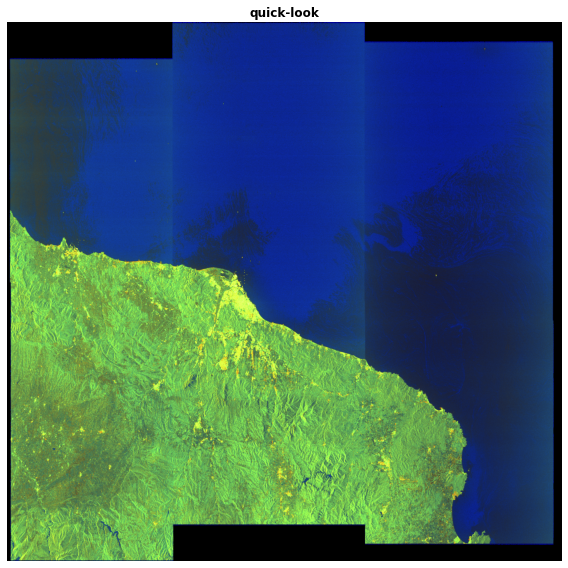

In [16]:
job.plot_quicklooks(filepaths="project_810e8039-cb5c-445b-b08d-53b0dde1bde0/job_02f371a3-6b74-4a00-b8d1-61332896d06e/679b09a8-94da-430a-ab96-57f110bd1252/S1B_IW_SLC__1SDV_20210305T174607_20210305T174634_025883_031642_A629.SAFE/preview/quick-look.png")